# Parcial de Regresión Lineal


## Preguntas de Negocio
1. **Predicción:** Si llega un carro con 92670.5 km, ¿a cuánto debería venderlo según el modelo?
2. **Inversión:** Como inversionista, ¿cuáles son los vehículos (según su kilometraje) que podrían generar un margen de ganancia atractivo?


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

## 1. Cargar y Preprocesar Datos

Se descarga el dataset de vehículos, se descomprime y se carga en un DataFrame. Además, se eliminan los valores faltantes.

In [6]:
# Descargar y descomprimir el dataset
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
!unzip -o cars_dataset.zip


--2025-03-12 20:21:01--  https://github.com/javierherrera1996/lecture_analytics/raw/main/cars_dataset.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip [following]
--2025-03-12 20:21:01--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/cars_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19753181 (19M) [application/zip]
Saving to: ‘cars_dataset.zip.1’

cars_dataset.zip.1  100%[===================>]  18.84M  81.0MB/s    in 0.2s    

2025-03-12 20:21:02 (81.0 MB/s) - ‘cars_dataset.zip.1’ saved [1975

In [12]:
df_cars = pd.read_csv('car_prices.csv')
df_cars.dropna(inplace=True)

## 2. Análisis Exploratorio de Datos (EDA)

Se generan estadísticas descriptivas para analizar las variables numéricas y entender la distribución de los datos.

In [13]:
df_cars.describe()


,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


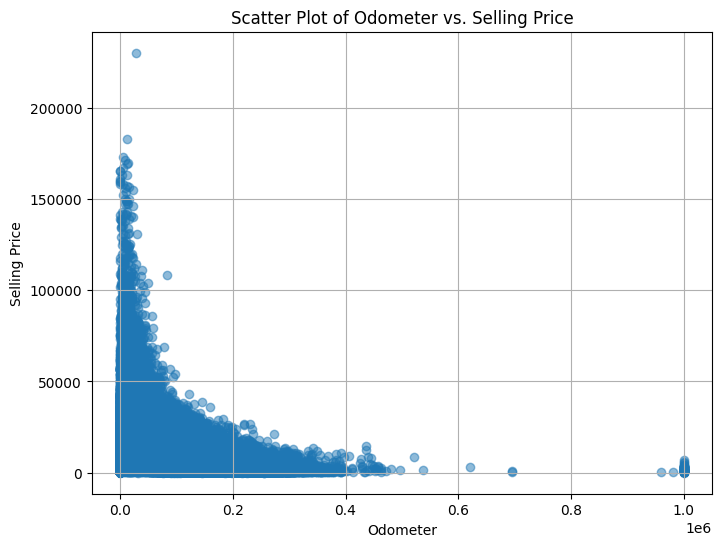

In [24]:
# prompt: # Gráfico de dispersión para ver la relación entre X y Y X = df_cars[['odometer']]
# y = df_cars['sellingprice']

import matplotlib.pyplot as plt

# Gráfico de dispersión para ver la relación entre X y Y
X = df_cars[['odometer']]
y = df_cars['sellingprice']

plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Odometer vs. Selling Price')
plt.grid(True)
plt.show()


## 3. Modelo de Regresión Lineal

Se utiliza la variable 'odometer' para predecir 'sellingprice'. Se dividen los datos en conjunto de entrenamiento y prueba (80%-20%).

In [28]:
X = df_cars[['odometer']]
y = df_cars['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Entrenamiento: {X_train.shape[0]} muestras")
print(f"Prueba: {X_test.shape[0]} muestras")
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Entrenamiento: 377860 muestras
Prueba: 94465 muestras


## 4. Evaluación del Modelo

Se evalúa el desempeño del modelo en el conjunto de prueba utilizando métricas como MSE, MAE y R².

In [30]:
# Extraer los coeficientes
intercept = model.intercept_
coef = model.coef_[0]

print(f"Intercept (beta_0): {intercept:.2f}")
print(f"Coeficiente (beta_1): {coef:.2f}")

Intercept (beta_0): 20836.52
Coeficiente (beta_1): -0.11


In [31]:
# Predicciones en entrenamiento y prueba
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# MSE y R^2 en entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# MSE y R^2 en prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Conjunto de Entrenamiento:")
print(f"MSE: {mse_train:.2f}")
print(f"R^2: {r2_train:.2f}")
print("\nConjunto de Prueba:")
print(f"MSE: {mse_test:.2f}")
print(f"R^2: {r2_test:.2f}")

Conjunto de Entrenamiento:
MSE: 61907392.09
R^2: 0.33

Conjunto de Prueba:
MSE: 60380220.40
R^2: 0.34


In [33]:
mae_test = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae_test:.2f}")


MAE: 5399.03


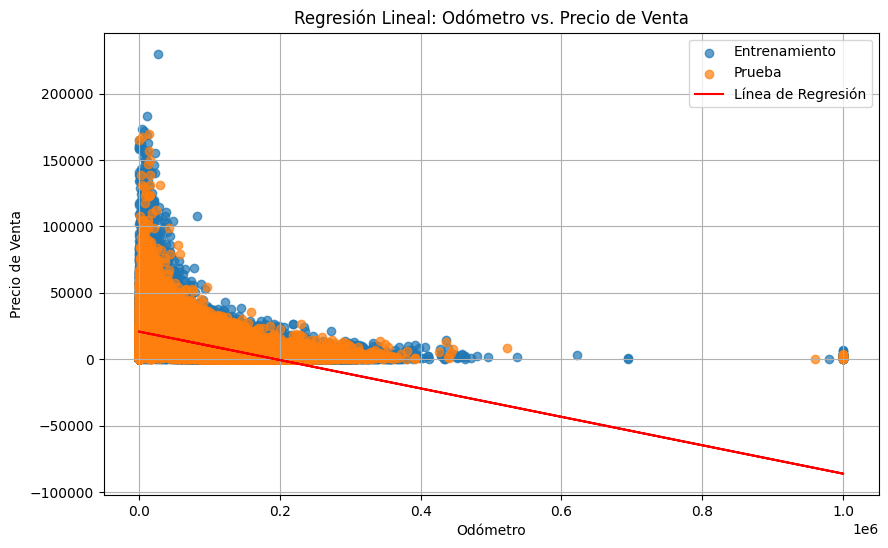

In [32]:
# Graficar la línea de regresión con los datos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Entrenamiento', alpha=0.7)
plt.scatter(X_test, y_test, label='Prueba', alpha=0.7)
plt.plot(X_test, y_pred_test, color='red', label='Línea de Regresión')
plt.xlabel('Odómetro')
plt.ylabel('Precio de Venta')
plt.title('Regresión Lineal: Odómetro vs. Precio de Venta')
plt.legend()
plt.grid(True)
plt.show()


## 5. Predicción y Respuestas a Preguntas de Negocio

### Pregunta 1: Precio Estimado para un Carro con 92670.5 km

Utilizamos el modelo para predecir el precio de venta de un carro con 92670.5 km.

In [34]:
new_car_mileage = [[92670.5]]
predicted_price = model.predict(new_car_mileage)
print(f"El precio estimado para un carro con 92670.5 km es: ${predicted_price[0]:.2f}")


El precio estimado para un carro con 92670.5 km es: $10916.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 6. Análisis Crítico de Resultados (10 Puntos Cerrados)

Responde a las siguientes preguntas de manera cerrada (Sí/No). Estas preguntas facilitan una calificación rápida:

1. ¿El coeficiente negativo (-0.107) indica que a mayor kilometraje, menor precio de venta? (Sí/No)
*SI*
2. ¿Un R² de 0.336 sugiere que el modelo explica más del 50% de la variabilidad en el precio de venta? (Sí/No)
*NO*
3. ¿El valor elevado del MSE indica que existen errores importantes en las predicciones? (Sí/No)
*SI*
4. ¿El MAE obtenido es suficientemente bajo para garantizar predicciones precisas en todos los casos? (Sí/No)
*NO*
5. ¿La eliminación de filas con valores faltantes puede reducir la robustez del modelo? (Sí/No)
*SI*
6. ¿Incluir variables adicionales como año, condición y marca podría mejorar la capacidad predictiva del modelo? (Sí/No)
*SI*
7. ¿La relación negativa entre kilometraje y precio es consistente con el comportamiento esperado en el mercado de vehículos? (Sí/No)
*SI*
8. ¿Dividir los datos en 80% entrenamiento y 20% prueba es una práctica recomendada para evaluar el modelo? (Sí/No)
*SI*